In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [13]:
conn = sqlite3.connect("../db.sqlite3")

query = """
    SELECT 
        ro.id AS order_id, ro.datetime, 
        roi.id AS orderitem_id, roi.quantity, 
        rp.id AS product_id, rp.price, rp.name
    FROM 
        restaurant_order AS ro
    JOIN 
        restaurant_orderitem AS roi ON ro.id = roi.order_id
    JOIN 
        restaurant_product AS rp ON roi.product_id = rp.id
"""

combined_df = pd.read_sql_query(query, conn)

conn.close()

combined_df.to_csv("combined_data.csv", index=False)

final_df = pd.read_csv("combined_data.csv")

print(f"Num of rows: {final_df.shape[0]}")


Num of rows: 74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

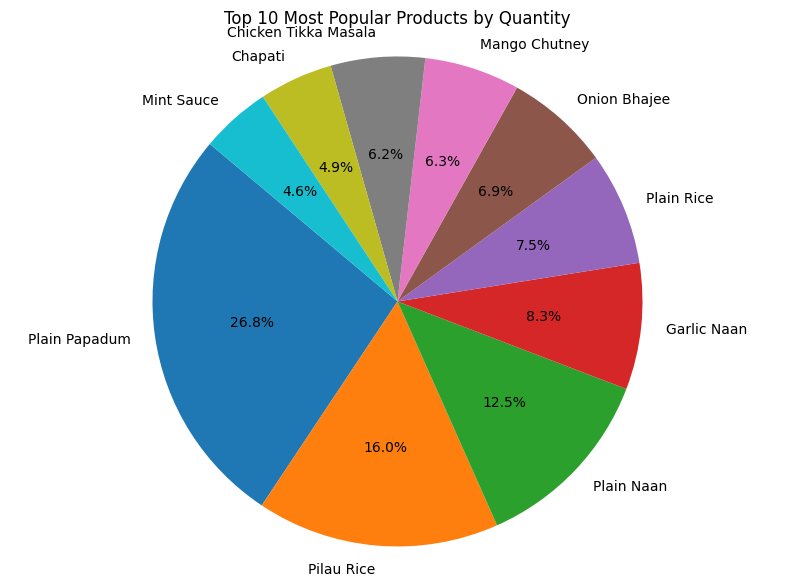

In [14]:
df = pd.read_csv("combined_data.csv")

product_quantity = df.groupby("name")["quantity"].sum().reset_index()

top_10_products = product_quantity.sort_values(by="quantity", ascending=False).head(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10_products["quantity"], labels=top_10_products["name"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products by Quantity")
plt.axis("equal")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

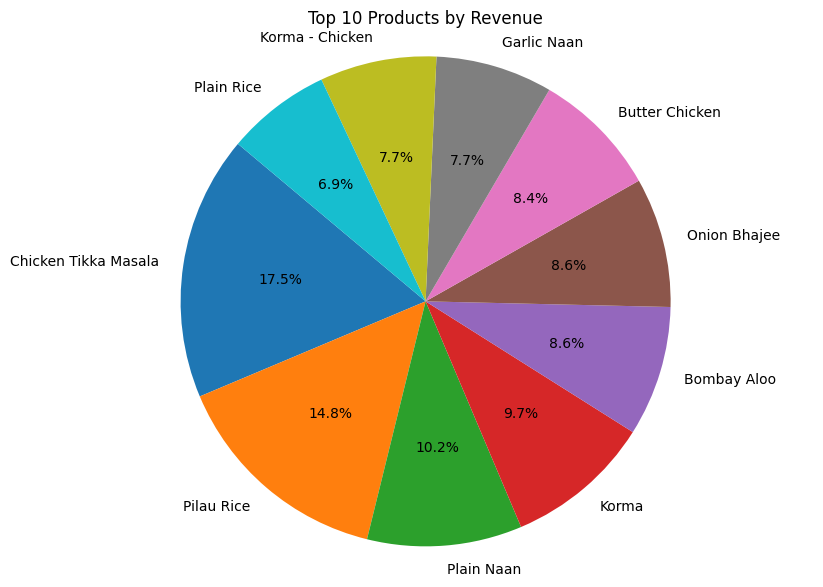

In [15]:
df["Item Price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("name")["Item Price"].sum().reset_index()

top_10_revenue_products = product_revenue.sort_values(by="Item Price", ascending=False).head(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10_revenue_products["Item Price"], labels=top_10_revenue_products["name"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Revenue")
plt.axis("equal")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

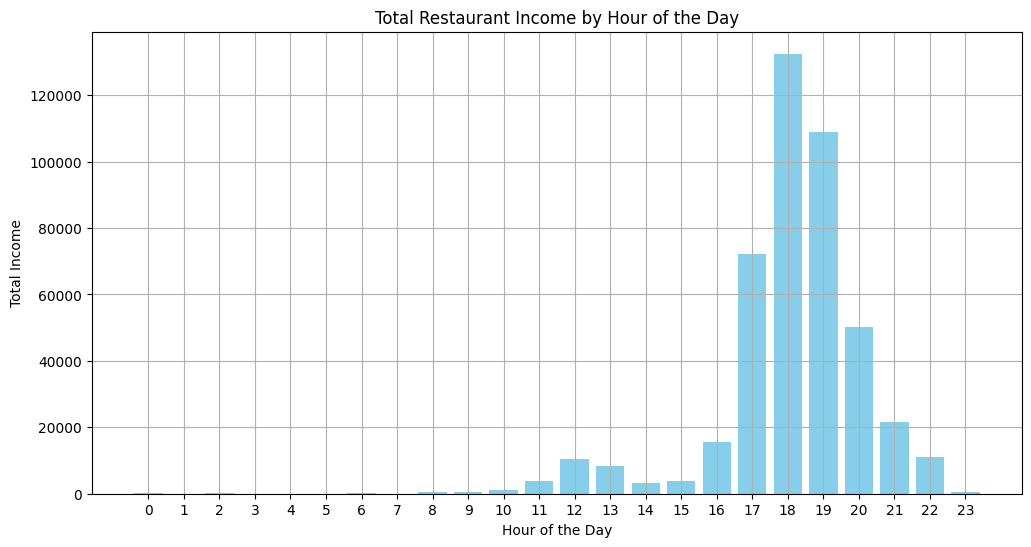

In [16]:
df["Order Hour"] = pd.to_datetime(df["datetime"]).dt.hour

hourly_income = df.groupby("Order Hour")["Item Price"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hourly_income["Order Hour"], hourly_income["Item Price"], color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

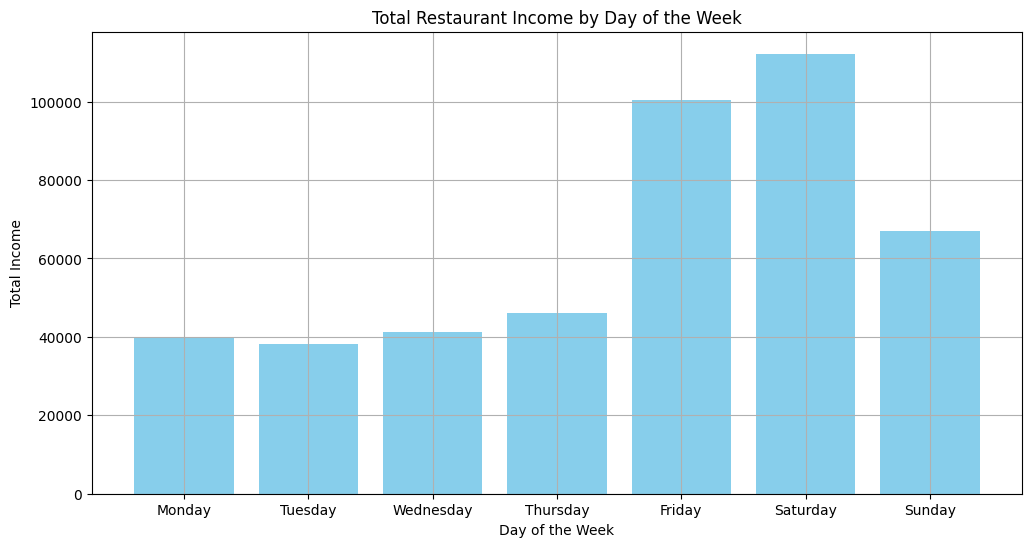

In [17]:
df["Order Day Of The Week"] = pd.to_datetime(df["datetime"]).dt.day_name()

weekday_income = df.groupby("Order Day Of The Week")["Item Price"].sum().reset_index()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_income["Order Day Of The Week"] = pd.Categorical(weekday_income["Order Day Of The Week"], categories=weekday_order, ordered=True)
weekday_income = weekday_income.sort_values("Order Day Of The Week")

plt.figure(figsize=(12, 6))
plt.bar(weekday_income["Order Day Of The Week"], weekday_income["Item Price"], color="skyblue")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Day of the Week")
plt.grid(True)
plt.show()
